<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/machine/PIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en Ingeniería en Computación 
##<center>Machine learning 
##<center>Modelo PIMA
##<center>Técnicas de procesamiento de información
###<center>Catedrática: Dr. Luis Carlos González Gurrola
###<center>Estudiante: Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->




In [ ]:
#Montando drive para descargar librería
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_PIMA = pd.read_csv("/content/drive/MyDrive/Machine_learning/PIMA/PIMA_training.csv",)
df_PIMA.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
df_PIMA.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,299.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,149.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,299.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,449.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,599.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


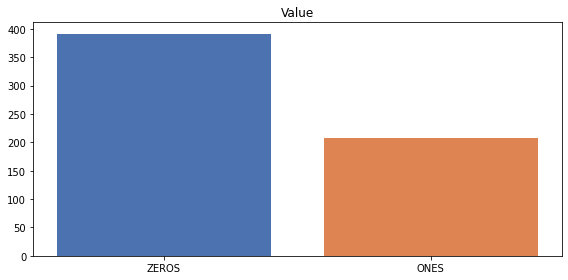

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['ZEROS', 'ONES'],
        height=df_PIMA.value_counts(['8']),
        color=colors[:2])
plt.title('Value')
plt.savefig('Unbalanced')
plt.show()

In [ ]:
df_PIMA["8"].value_counts()

0.0    392
1.0    208
Name: 8, dtype: int64

#Balanceando
Debido a que el DATA esta desvalanceado, se procedera a balancearlo.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
#Ajustando el data set, pasando como parametros las entradas X y Salidas Y (ó tarjects T)
df_PIMA_bal,df_PIMA_bal["8"]=rus.fit_resample(df_PIMA[[str(i) for i in range(8)]], df_PIMA["8"])


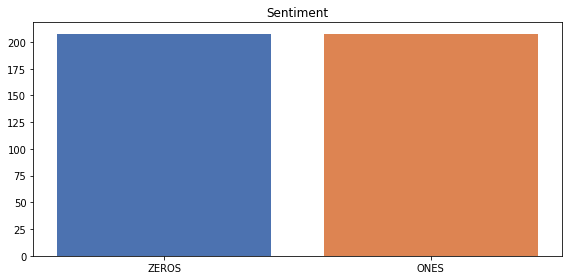

In [ ]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['ZEROS', 'ONES'],
        height=df_PIMA_bal.value_counts(['8']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [ ]:
df_PIMA_bal["8"].value_counts()

0.0    208
1.0    208
Name: 8, dtype: int64

#Separar en train y val
Debido a que el test lo tiene el docente para realizar las pruebas solo se usara el una parte para validación

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_val=train_test_split(df_PIMA_bal, test_size=0.10,random_state=42)

train_x,train_y=df_train[[str(i) for i in range(8)]], df_train['8']
val_x,val_y=df_val[[str(i) for i in range(8)]], df_val['8']

In [ ]:
train_x

,0,1,2,3,4,5,6,7
227,9.0,102.0,76.0,37.0,0.0,32.9,0.665,46.0
376,8.0,108.0,70.0,0.0,0.0,30.5,0.955,33.0
15,6.0,154.0,78.0,41.0,140.0,46.1,0.571,27.0
126,4.0,114.0,65.0,0.0,0.0,21.9,0.432,37.0
113,10.0,122.0,78.0,31.0,0.0,27.6,0.512,45.0
...,...,...,...,...,...,...,...,...
71,1.0,79.0,75.0,30.0,0.0,32.0,0.396,22.0
106,0.0,165.0,76.0,43.0,255.0,47.9,0.259,26.0
270,0.0,129.0,110.0,46.0,130.0,67.1,0.319,26.0
348,6.0,124.0,72.0,0.0,0.0,27.6,0.368,29.0


#Nota sobre la separación del Dataset
Se ha decidido no utilizar la data dividida en test y train, por que se ha optado por utilizar validación cruzada para evaluar los modelos de ML

#Procesamiento de datos

In [ ]:
#Prepocessing data with StandardScaler
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
train_x_ss = s_scaler.fit_transform(train_x)
val_x_ss = s_scaler.transform(val_x)


In [ ]:
#Prepocessing data with StandardScaler
from sklearn.preprocessing import RobustScaler
r_sclaer = RobustScaler()
train_x_rs = r_sclaer.fit_transform(train_x)
val_x_rs = r_sclaer.transform(val_x)


In [ ]:
train_x_comp, train_y_comp=df_PIMA_bal[[str(i) for i in range(8)]], df_PIMA_bal['8']
train_x_comp.tail()

,0,1,2,3,4,5,6,7
411,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52.0
412,11.0,111.0,84.0,40.0,0.0,46.8,0.925,45.0
413,3.0,132.0,80.0,0.0,0.0,34.4,0.402,44.0
414,0.0,188.0,82.0,14.0,185.0,32.0,0.682,22.0
415,1.0,173.0,74.0,0.0,0.0,36.8,0.088,38.0


##Nota sobre el procesamiento:
Debido a que el modelo se exportara a formato pickle para su evaluación y no se podran procesar de la misma manera, se decidira trabajar con la data sin procesar

#Modelos de ML
Utilizaremos validación cruzada para evaluar diferentes modelos de machine learning para selecionar el que mejor se desempeñe.

*texto en cursiva*##Suport Vector Machines (SVM)



In [ ]:
from sklearn.svm import SVC 

svc_lin = SVC(kernel="linear")
svc_rbf = SVC(kernel="rbf")



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()


##Native Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


## Logistic Regreassion 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_40 =RandomForestClassifier(n_estimators=40)
rf_15 =RandomForestClassifier(n_estimators=15)

#Evaluación 
Aquí se muestra la evalución de los modelos de ML, se ha utilizado validación cruzada para evaluar el desempeño.

Validación cruzada conciste en separar el data set en n-partes, entrenar el modelo n veces dejando una de las partes del data set para evaluación, usando una parte diferente en cada entrenamiento.

A continuación se puede ver el score que tuvo cada modelo en cada entrenamiento, como también el promedio de estos valores.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
svc_lin_score =cross_val_score(svc_lin,train_x_comp,train_y_comp,cv=5)
print(svc_lin_score)
print(sum(svc_lin_score)/len(svc_lin_score))

[0.80952381 0.78313253 0.73493976 0.62650602 0.79518072]
0.7498565691336776


In [ ]:
svc_rbf_score =cross_val_score(svc_rbf,train_x_comp,train_y_comp,cv=5)
print(svc_rbf_score)
print(sum(svc_rbf_score)/len(svc_rbf_score))

[0.66666667 0.69879518 0.75903614 0.68674699 0.77108434]
0.7164658634538152


In [ ]:
dec_tree_score =cross_val_score(dec_tree,train_x_comp,train_y_comp,cv=5)
print(dec_tree_score)
print(sum(dec_tree_score)/len(dec_tree_score))

[0.70238095 0.63855422 0.6626506  0.6626506  0.6626506 ]
0.6657773952954675


In [ ]:
gnb_score =cross_val_score(gnb,train_x_comp,train_y_comp,cv=5)
print(gnb_score)
print(sum(gnb_score)/len(gnb_score))

[0.76190476 0.71084337 0.71084337 0.68674699 0.77108434]
0.7282845668387837


In [ ]:
lr_score =cross_val_score(lr,train_x_comp,train_y_comp,cv=5)
print(lr_score)
print(sum(lr_score)/len(lr_score))

[0.79761905 0.77108434 0.73493976 0.6626506  0.78313253]
0.7498852553069421


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
rf_40_score =cross_val_score(rf_40,train_x_comp,train_y_comp,cv=5)
print(rf_40_score)
print(sum(rf_40_score)/len(rf_40_score))

[0.78571429 0.78313253 0.68674699 0.68674699 0.78313253]
0.7450946643717729


In [ ]:
rf_15_score =cross_val_score(rf_15,train_x_comp,train_y_comp,cv=5)
print(rf_15_score)
print(sum(rf_15_score)/len(rf_15_score))

[0.77380952 0.80722892 0.6626506  0.68674699 0.71084337]
0.7282558806655193


##Resultados de validación cruzada:

Se puede observar que el modelo *svc_lin* fue el que tuvo un mejor score


#Entrenando modelos

In [ ]:
svc_lin.fit(train_x_comp,train_y_comp)
svc_rbf.fit(train_x_comp,train_y_comp)
dec_tree.fit(train_x_comp,train_y_comp)
gnb.fit(train_x_comp,train_y_comp)
lr.fit(train_x_comp,train_y_comp)
rf_40.fit(train_x_comp,train_y_comp)
rf_15.fit(train_x_comp,train_y_comp)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RandomForestClassifier(n_estimators=15)

##Evaluación 
Aquí se hace un experimento de evaluación, se utilizara los mismos datos de entrenamiento como test, esta evaluación no es valida pero ayudara a ver como un modelo puede dar un score errado si se le evalua con los datos de entrenamiento.
Como ya se ha visto al usar validación cruzada, donde se evaluava el score con datos fuera del train_set discrepan los valores con los que se obtienen a continuación

In [ ]:
print(f"Modelo SVC_lin con validación: {svc_lin.score(train_x_comp,train_y_comp)}")



print(f"Modelo SVC_rbf con validación: {svc_rbf.score(train_x_comp,train_y_comp)}")


print(f"Modelo Dec_tree con validación: {dec_tree.score(train_x_comp,train_y_comp)}")


print(f"Modelo gnb con validación: {gnb.score(train_x_comp,train_y_comp)}")


print(f"Modelo lr con validación: {lr.score(train_x_comp,train_y_comp)}")


print(f"Modelo rf40 con validación: {rf_40.score(train_x_comp,train_y_comp)}")


print(f"Modelo rf15 con validación: {rf_15.score(train_x_comp,train_y_comp)}")


Modelo SVC_lin con validación: 0.7548076923076923
Modelo SVC_rbf con validación: 0.7211538461538461
Modelo Dec_tree con validación: 1.0
Modelo gnb con validación: 0.7259615384615384
Modelo lr con validación: 0.7307692307692307
Modelo rf40 con validación: 1.0
Modelo rf15 con validación: 1.0


In [ ]:
import pickle

In [ ]:
"""with open("/content/drive/MyDrive/Machine_learning/PIMA/model_pickle2","wb") as file:
  s=pickle.dump(svc_lin,file)"""

'with open("/content/drive/MyDrive/Machine_learning/PIMA/model_pickle2","wb") as file:\n  s=pickle.dump(svc_lin,file)'

In [ ]:
"""with open("/content/drive/MyDrive/Machine_learning/PIMA/model_pickle2","rb") as file:
  model=pickle.load(file)"""

'with open("/content/drive/MyDrive/Machine_learning/PIMA/model_pickle2","rb") as file:\n  model=pickle.load(file)'

In [ ]:
"""print(f"Modelo SVC con test: {model.score(test_x,test_y)}\n")"""

'print(f"Modelo SVC con test: {model.score(test_x,test_y)}\n")'

#Optimización 
Se optimizara los parametros del modelo que ha dado un mejor score, *Suport vector machine*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc2= SVC()
svc_grid = GridSearchCV(svc2,parameters, cv=5,)
#              refit=True, verbose=0)
svc_grid.fit(train_x_comp, train_y_comp)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [ ]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 4, 'kernel': 'linear'}
SVC(C=4, kernel='linear')


In [ ]:
svc_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})>

In [ ]:
scv2=SVC(C=8,kernel="linear")
scv2_score =cross_val_score(scv2,train_x_comp,train_y_comp,cv=5)
print(scv2_score)
print(sum(scv2_score)/len(scv2_score))

[0.78571429 0.78313253 0.72289157 0.65060241 0.79518072]
0.7475043029259897


In [ ]:
scv2.fit(train_x_comp,train_y_comp)

SVC(C=8, kernel='linear')

In [ ]:
print(f"Modelo SVC_lin con train: {scv2.score(train_x_comp,train_y_comp)}")


Modelo SVC_lin con train: 0.7524038461538461


#Exportando pickle


In [ ]:
"""with open("/content/drive/MyDrive/Machine_learning/PIMA/model_pickle3","wb") as file:
  s=pickle.dump(scv2,file)"""

'with open("/content/drive/MyDrive/Machine_learning/PIMA/model_pickle3","wb") as file:\n  s=pickle.dump(scv2,file)'

In [ ]:
with open("/content/drive/MyDrive/Machine_learning/PIMA/model_pickle3","rb") as file:
  model=pickle.load(file)

In [ ]:
model.score(train_x_comp,train_y_comp)

0.7548076923076923

In [ ]:
train_x_comp

,0,1,2,3,4,5,6,7
0,4.0,117.0,64.0,27.0,120.0,33.2,0.230,24.0
1,5.0,95.0,72.0,33.0,0.0,37.7,0.370,27.0
2,12.0,121.0,78.0,17.0,0.0,26.5,0.259,62.0
3,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
4,3.0,113.0,44.0,13.0,0.0,22.4,0.140,22.0
...,...,...,...,...,...,...,...,...
411,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52.0
412,11.0,111.0,84.0,40.0,0.0,46.8,0.925,45.0
413,3.0,132.0,80.0,0.0,0.0,34.4,0.402,44.0
414,0.0,188.0,82.0,14.0,185.0,32.0,0.682,22.0


In [ ]:
train_y_comp

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
411    1.0
412    1.0
413    1.0
414    1.0
415    1.0
Name: 8, Length: 416, dtype: float64